In [63]:
import pandas as pd

# Load the test dataset
test_file_path = 'C:/Users/KIIT0001/Desktop/ML PROJECT/pythonProject/DATA/nvidia_stock_prices.csv'
test = pd.read_csv(test_file_path)

test['Date'] = pd.to_datetime(test['Date'])
test.set_index('Date', inplace=True)

columns_to_drop = ['Dividends', 'Stock Splits']
existing_columns = [col for col in columns_to_drop if col in test.columns]
test_cleaned = test.drop(columns=existing_columns, errors='ignore')

test_cleaned.head()

,Open,High,Low,Close,Volume
Date,,,,,
2004-01-02,0.196417,0.199083,0.192333,0.192333,436416000
2004-01-05,0.195250,0.199917,0.193500,0.198583,575292000
2004-01-06,0.198000,0.209417,0.197083,0.206667,1093344000
2004-01-07,0.204333,0.209500,0.202917,0.208500,673032000
2004-01-08,0.211083,0.212083,0.207250,0.209250,433752000


In [64]:

import joblib
scaler = joblib.load('scaler.pkl')

# Scale the test dataset
scaled_test = pd.DataFrame(
    scaler.transform(test_cleaned),
    index=test_cleaned.index,
    columns=test_cleaned.columns
)

scaled_test['7-Day MA'] = scaled_test['Close'].rolling(window=7).mean()

scaled_test = scaled_test.dropna()

scaled_test.head()


,Open,High,Low,Close,Volume,7-Day MA
Date,,,,,,
2004-01-12,0.001295,0.001298,0.001363,0.001353,0.056703,0.001289
2004-01-13,0.001299,0.001301,0.001290,0.001271,0.091858,0.001301
2004-01-14,0.001235,0.001243,0.001281,0.001260,0.057017,0.001305
2004-01-15,0.001206,0.001219,0.001257,0.001262,0.064001,0.001300
2004-01-16,0.001234,0.001241,0.001299,0.001285,0.046905,0.001297


In [65]:

X_test = scaled_test.drop(columns=['Close'])
y_test = scaled_test['Close']

print("Features shape:", X_test.shape)
print("Target shape:", y_test.shape)


Features shape: (5027, 5)
Target shape: (5027,)


In [66]:

linear_model = joblib.load('linear_regression_model.pkl')
lasso_model = joblib.load('lasso_regression_model.pkl')

y_pred_linear = linear_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

print("First 5 Predictions (Linear Regression):", y_pred_linear[:5])
print("First 5 Predictions (Lasso Regression):", y_pred_lasso[:5])


First 5 Predictions (Linear Regression): [0.00134232 0.00128443 0.00126913 0.00124796 0.00128229]
First 5 Predictions (Lasso Regression): [0.00177681 0.00171038 0.00170236 0.0016806  0.00171897]


In [67]:
from sklearn.metrics import mean_squared_error, r2_score

linear_mse = mean_squared_error(y_test, y_pred_linear)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
linear_r2 = r2_score(y_test, y_pred_linear)
lasso_r2 = r2_score(y_test, y_pred_lasso)

print("Performance on Test Dataset:")
print("Linear Regression - MSE:", linear_mse, "R2:", linear_r2)
print("Lasso Regression - MSE:", lasso_mse, "R2:", lasso_r2)


Performance on Test Dataset:
Linear Regression - MSE: 7.39565536315626e-07 R2: 0.9998540252329102
Lasso Regression - MSE: 4.6538427412019074e-05 R2: 0.9908142878911889


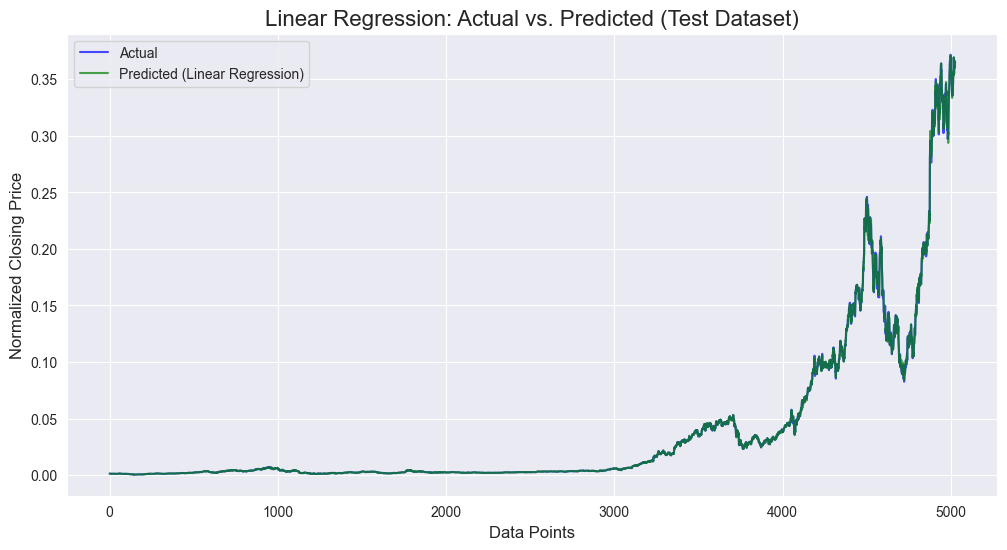

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', color='blue', alpha=0.7)
plt.plot(y_pred_linear, label='Predicted (Linear Regression)', color='green', alpha=0.7)
plt.title('Linear Regression: Actual vs. Predicted (Test Dataset)', fontsize=16)
plt.xlabel('Data Points', fontsize=12)
plt.ylabel('Normalized Closing Price', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


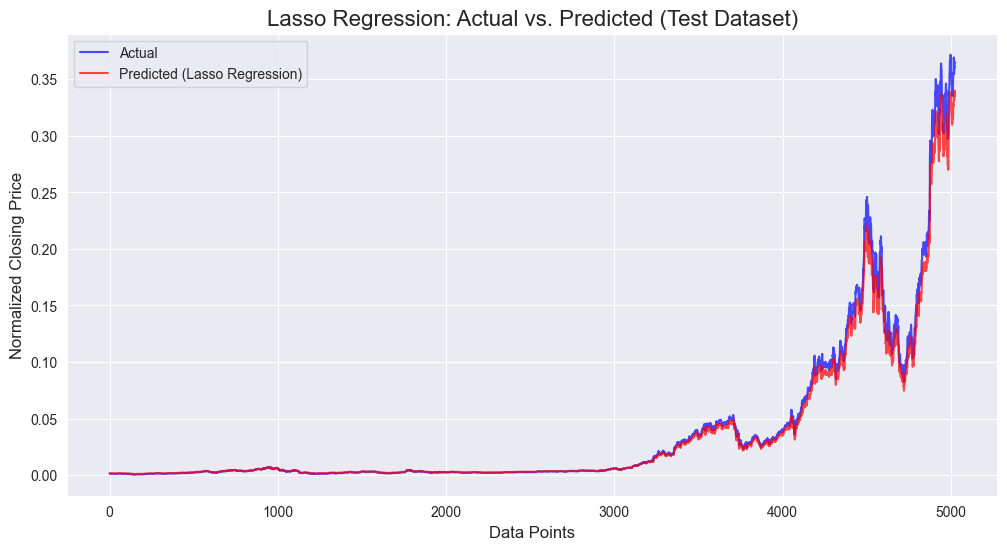

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', color='blue', alpha=0.7)
plt.plot(y_pred_lasso, label='Predicted (Lasso Regression)', color='red', alpha=0.7)
plt.title('Lasso Regression: Actual vs. Predicted (Test Dataset)', fontsize=16)
plt.xlabel('Data Points', fontsize=12)
plt.ylabel('Normalized Closing Price', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()